# Análisis de los datos crudos de los picos en 410, para decimaciones 1 y 2

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import utils as ut
import scipy.stats as ss

In [2]:
p = Path('.')
data_path1 = p/"data"/"410"/"1"
data_path2 = p/"data"/"410"/"2"
df = pd.read_pickle(p/"data"/"410"/"1"/"1_0.pickle")

In [3]:
%matplotlib widget

In [4]:
%matplotlib inline

0.000262144
0.000524288


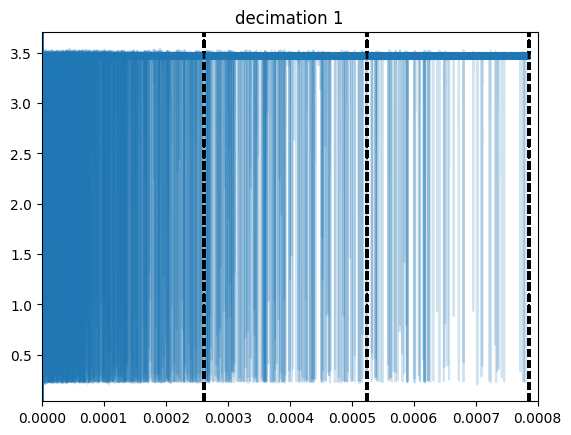

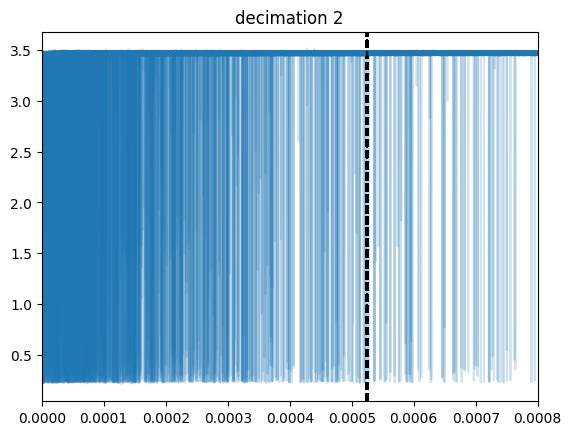

In [5]:

def calc_dec(dec_exp):
    return (2**14) * 2**dec_exp  / 125e6
dec1_cut = calc_dec(1)
dec2_cut = calc_dec(2)
print(dec1_cut)
print(dec2_cut)

for path in data_path1.glob("*.pickle"):
    df = pd.read_pickle(path)
    plt.title("decimation 1")
    plt.plot(df.time, df.ch1, color="C0", alpha=0.2)
    plt.axvline()
    plt.axvline(dec1_cut, linestyle="dashed", color="k", alpha=0.4)
    plt.axvline(dec1_cut*2, linestyle="dashed", color="k", alpha=0.4)
    plt.axvline(dec1_cut*3, linestyle="dashed", color="k", alpha=0.4)

plt.xlim([0, 8e-4])
plt.show()

for path in data_path2.glob("*.pickle"):
    df = pd.read_pickle(path)
    plt.title("decimation 2")
    plt.plot(df.time, df.ch1, color="C0", alpha=0.2)
    plt.axvline(dec2_cut, linestyle="dashed", color="k", alpha=0.4)
    plt.axvline(dec2_cut*2, linestyle="dashed", color="k", alpha=0.4)
    plt.axvline(dec2_cut*3, linestyle="dashed", color="k", alpha=0.4)

plt.xlim([0, 8e-4])
plt.show()

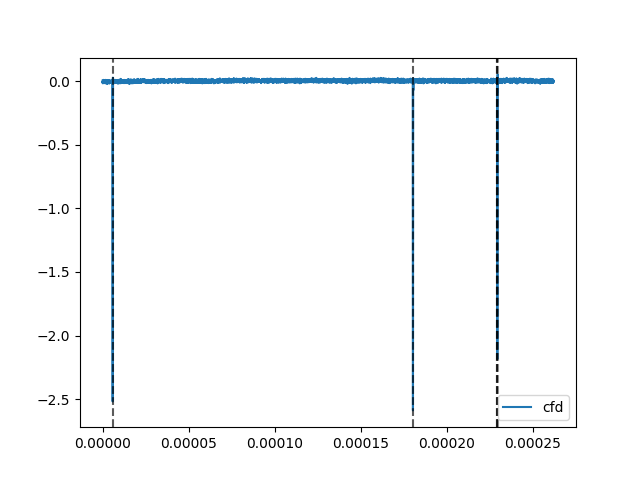

           time       ch1       ch2
369    0.000006 -2.919922  0.544434
371    0.000006 -2.077637  1.386719
11280  0.000180 -2.724609  0.739746
11282  0.000181 -1.538086  1.926270
14342  0.000229 -2.287598  1.176758
14344  0.000230 -2.731934  0.732422
14346  0.000230 -2.565918  0.898438
14348  0.000230 -2.111816  1.352539
14350  0.000230 -1.635742  1.828613


In [30]:
%matplotlib widget
dly = 1
rep = 0

df = pd.read_pickle(data_path1/f"{dly}_{rep}.pickle")
df.ch1 = df.ch1 - df.ch1.median()

peaks = ut.find_arrival_times(df)

plt.close("all")
#plt.plot(df.time, df.ch1)
#plt.plot(df.time, np.diff(df.ch1, prepend=0))
#plt.axhline(0.5)

f = 0.2
tr = 5e-7
td = tr * (1 - f)
dt = df.loc[1, "time"] - df.loc[0, "time"]
ind = (df.index - td//dt).astype(int)
delayed = df.iloc[ind, 1] 
inv = -df.ch1*f
#plt.plot(df.time, inv, label="inverted")
#plt.plot(df.time, delayed, label="delayed")
plt.plot(df.time, inv + delayed, label="cfd")
plt.legend()

for i, peak in enumerate(peaks.time):
    plt.axvline(peak, linestyle="dashed", color="k", alpha=0.4)
plt.show()
print(peaks)

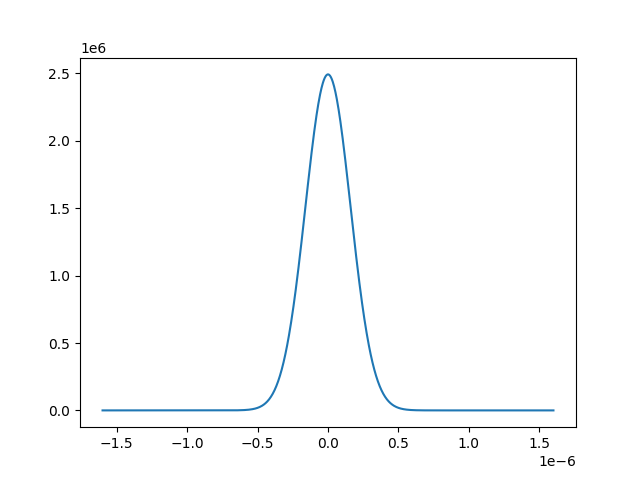

[0.00000000e+00 1.60009766e-08 3.20019532e-08 ... 2.62111998e-04
 2.62127999e-04 2.62144000e-04]


In [47]:
plt.close('all')

bs = 2**14
dec = 1
st = (2**dec)/125e6
sig = np.linspace(0, bs*st, 2**14)

rv = ss.norm(loc=0, scale=5*st)


t = np.linspace(-100*st, 100*st, 1000)
plt.plot(t, rv.pdf(t))
plt.show()

print(sig)